<a href="https://colab.research.google.com/github/sikha2552/Vibration_Analysis_DMD/blob/main/Vibration_DMD_Kitchensync.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CLASSIFICATION OF VIBRATION DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Check the current working directory
import os
os.getcwd()

'/content'

In [ ]:
#Change Direcory
#os.chdir('D:\\RESEARCH\\POST_PHD\\00_ANACONDA_CODES\\JITHIN')
#Change Direcory
os.chdir('/content/drive/MyDrive/MY_Learnings/JITHIN_Vibration_analysis')

In [ ]:
ls

'Phi_1-3-5-7-9 into Psi_1-3-5-7-9_28001into5.mat'
 Phi_into_Psi_5_2000_UPDATE.mat
'Phi into Psi_all but single columns_2000 each.mat'
 RKS_28000.mat
'Updated_Vibration_DMD_Phi into Psi_all but single columns_2000 each.ipynb'
 Vibration_DMD_Kitchensync.ipynb
'Vibration_DMD_Phi into Psi_all but single columns_2000 each.ipynb'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score,cross_val_predict

from sklearn import metrics
from sklearn.metrics import (precision_score,
                            accuracy_score,
                            recall_score,
                            f1_score)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#To lad a .mat file
from scipy.io import loadmat
phdiff = loadmat("RKS_28000.mat")
#dada_set will be loaded as a dictionary 

In [ ]:
print(phdiff)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Dec 27 23:40:37 2022', '__version__': '1.0', '__globals__': [], 'RKS_save1': array([[0.72844058, 0.72743937, 0.72643694, ..., 0.37026453, 0.36780855,
        0.36530233],
       [0.58168774, 0.58318702, 0.58470915, ..., 0.41289954, 0.41292941,
        0.41298483],
       [0.90590066, 0.90567625, 0.90545698, ..., 0.21254526, 0.21298582,
        0.21343298],
       ...,
       [0.99984881, 0.99984921, 0.99984961, ..., 0.01690866, 0.01693464,
        0.01695919],
       [0.9999697 , 0.99996985, 0.99996999, ..., 0.00966675, 0.00967858,
        0.00968975],
       [0.99999859, 0.99999858, 0.99999856, ..., 0.00642803, 0.00640265,
        0.00637737]])}


In [ ]:
print(phdiff.keys())

dict_keys(['__header__', '__version__', '__globals__', 'RKS_save1'])


In [ ]:
data = [[element for element in upperElement] for upperElement in phdiff['RKS_save1']]


In [ ]:
df = pd.DataFrame(data)

In [ ]:
#Print the first five entries
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5590,5591,5592,5593,5594,5595,5596,5597,5598,5599
0,0.728441,0.727439,0.726437,0.725433,0.724429,0.723426,0.722423,0.721420,0.720420,0.719422,...,0.386029,0.383931,0.381782,0.379581,0.377329,0.375025,0.372670,0.370265,0.367809,0.365302
1,0.581688,0.583187,0.584709,0.586252,0.587816,0.589398,0.590998,0.592613,0.594244,0.595887,...,0.413396,0.413250,0.413129,0.413033,0.412961,0.412916,0.412895,0.412900,0.412929,0.412985
2,0.905901,0.905676,0.905457,0.905243,0.905034,0.904830,0.904632,0.904440,0.904253,0.904071,...,0.209636,0.210033,0.210436,0.210846,0.211261,0.211683,0.212111,0.212545,0.212986,0.213433
3,0.996871,0.996871,0.996871,0.996871,0.996872,0.996873,0.996874,0.996875,0.996877,0.996879,...,0.114697,0.114763,0.114830,0.114899,0.114968,0.115038,0.115109,0.115181,0.115254,0.115328
4,0.995391,0.995387,0.995384,0.995380,0.995377,0.995373,0.995369,0.995365,0.995360,0.995356,...,0.082085,0.082084,0.082083,0.082081,0.082080,0.082078,0.082077,0.082076,0.082074,0.082073


In [ ]:
#Print the shape of the dataframe
df.shape

(156, 5600)

In [ ]:
#Checking for null values
df.isna()

,0,1,2,3,4,5,6,7,8,9,...,5590,5591,5592,5593,5594,5595,5596,5597,5598,5599
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.loc[0:51,5600]=1
df.loc[52:103,5600]=2
df.loc[104:156,5600]=3

In [ ]:
 # Seperating features and labels
data =  df.loc[:,0 : 5599]  # Features
label = df[5600] # targets
label

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
151    3.0
152    3.0
153    3.0
154    3.0
155    3.0
Name: 5600, Length: 156, dtype: float64

In [ ]:
#Print the count of instances in each class
label.value_counts()

1.0    52
2.0    52
3.0    52
Name: 5600, dtype: int64

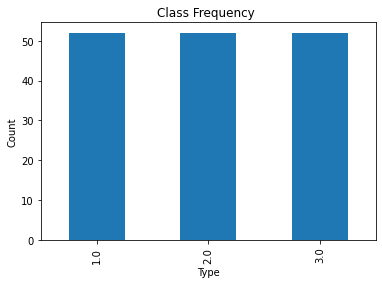

In [ ]:
#Plot the class distribution
label.value_counts().plot(kind='bar', title="Class Frequency ", 
                                 xlabel="Type", 
                                 ylabel="Count")

In [ ]:
#Split the data to train test 80:20
X_train,X_test,Y_train,Y_test = train_test_split(data,label,test_size=0.2,random_state=432)
print("Train Samples",X_train.shape)
print("Test Samples",X_test.shape)

Train Samples (124, 5600)
Test Samples (32, 5600)


In [ ]:
X_train=X_train.abs()#*100000
X_test=X_test.abs() #*100000

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,5590,5591,5592,5593,5594,5595,5596,5597,5598,5599
143,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,...,0.005501,0.005503,0.005506,0.005508,0.005510,0.005512,0.005513,0.005515,0.005517,0.005518
52,0.454487,0.453944,0.453327,0.452635,0.451867,0.451024,0.450106,0.449113,0.448045,0.446903,...,0.654000,0.653480,0.652957,0.652431,0.651901,0.651368,0.650833,0.650296,0.649757,0.649216
18,0.959463,0.959374,0.959285,0.959197,0.959111,0.959025,0.958940,0.958857,0.958774,0.958692,...,0.107381,0.106958,0.106535,0.106112,0.105689,0.105265,0.104842,0.104420,0.103997,0.103576
113,0.999994,0.999994,0.999994,0.999994,0.999994,0.999994,0.999994,0.999994,0.999994,0.999994,...,0.005998,0.005991,0.005983,0.005975,0.005966,0.005958,0.005949,0.005940,0.005931,0.005921
37,0.997563,0.997574,0.997586,0.997598,0.997611,0.997625,0.997639,0.997655,0.997671,0.997688,...,0.023561,0.023143,0.022723,0.022301,0.021876,0.021450,0.021023,0.020594,0.020164,0.019732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.995381,0.995384,0.995388,0.995391,0.995396,0.995400,0.995405,0.995410,0.995416,0.995421,...,0.114971,0.114905,0.114838,0.114769,0.114699,0.114628,0.114555,0.114482,0.114407,0.114331
96,0.994523,0.994321,0.994113,0.993899,0.993680,0.993455,0.993225,0.992989,0.992748,0.992502,...,0.699351,0.701101,0.702812,0.704485,0.706118,0.707711,0.709264,0.710776,0.712247,0.713678
107,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,...,0.001989,0.001988,0.001987,0.001987,0.001986,0.001986,0.001985,0.001984,0.001984,0.001983
128,0.999992,0.999992,0.999992,0.999992,0.999992,0.999992,0.999992,0.999992,0.999992,0.999992,...,0.000172,0.000178,0.000184,0.000190,0.000196,0.000202,0.000208,0.000214,0.000221,0.000227


In [ ]:
# Feature Scaling
sc = StandardScaler()
X_trains = sc.fit_transform(X_train)
X_tests = sc.transform(X_test)

# SVM Classification

## RBC Kernel

In [ ]:
# SVM Classification
svcrbf=SVC(kernel="rbf", C=500) 
svcrbf.fit(X_trains,Y_train)
#Y_pred = svc.predict(X_test)

#print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv1 = RepeatedKFold(n_splits=20, n_repeats=300,random_state=42)
score = cross_val_score(svcrbf, X_tests, Y_test, scoring='accuracy', cv=cv1)
print("Accuracy = " )
print(np.mean(score))
#with scaling , C=150,n_splits=20, n_repeats=300--- 84.86



Accuracy = 
0.8486666666666667


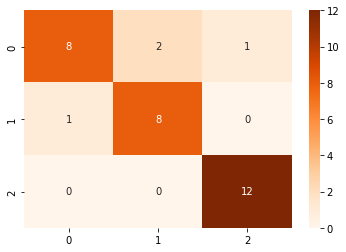

In [ ]:
# Plotting confusion Matrix for Knn
from sklearn.metrics import confusion_matrix
Y_predsvm = cross_val_predict(svcrbf, X_test, Y_test, cv=10)

cf_matrix = confusion_matrix(Y_test, Y_predsvm)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Oranges")
plt.show()

In [ ]:
# Classification Report of SVM
print(classification_report(Y_test, Y_predsvm, 
                            target_names = ['1','2','3']))

              precision    recall  f1-score   support

           1       0.89      0.73      0.80        11
           2       0.80      0.89      0.84         9
           3       0.92      1.00      0.96        12

    accuracy                           0.88        32
   macro avg       0.87      0.87      0.87        32
weighted avg       0.88      0.88      0.87        32



In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_predsvm,average='macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_predsvm,average='macro')
print('Recall: %f' % recall)

f1score = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1score)

Precision: 0.870655
Recall: 0.872054
F1 score: 0.871354


## Linear Kernel

In [ ]:
# SVM Classification
svclin=SVC(kernel="linear",C=200) 
svclin.fit(X_trains,Y_train)
#Y_pred = svc.predict(X_test)

#print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv1 = RepeatedKFold(n_splits=20, n_repeats=100,random_state=42)
score = cross_val_score(svclin, X_tests, Y_test, scoring='accuracy', cv=cv1)
print("Accuracy = " )
print(np.mean(score))
#with scaling , C=200,n_splits=20, n_repeats=70--- 87.5

Accuracy = 
0.875


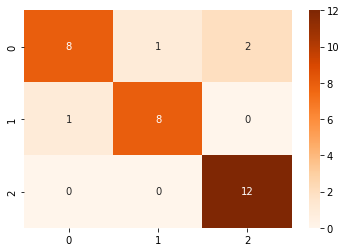

In [ ]:
# Plotting confusion Matrix for Knn
from sklearn.metrics import confusion_matrix
Y_predsvm = cross_val_predict(svclin, X_test, Y_test, cv=10)
cf_matrix = confusion_matrix(Y_test, Y_predsvm)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Oranges")
plt.show()

In [ ]:
# Classification Report of SVM
print(classification_report(Y_test, Y_predsvm, 
                            target_names = ['1','2','3']))

              precision    recall  f1-score   support

           1       0.89      0.73      0.80        11
           2       0.89      0.89      0.89         9
           3       0.86      1.00      0.92        12

    accuracy                           0.88        32
   macro avg       0.88      0.87      0.87        32
weighted avg       0.88      0.88      0.87        32



In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_predsvm,average='macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_predsvm,average='macro')
print('Recall: %f' % recall)

f1score = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1score)

Precision: 0.878307
Recall: 0.872054
F1 score: 0.875169


## Polynomial Kernel

In [ ]:
# SVM Classification using polynomial kernel
svcpoly=SVC(kernel="sigmoid",C=100) 
svcpoly.fit(X_trains,Y_train)


#Y_pred = svc1.predict(X_test)

#print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv1 = RepeatedKFold(n_splits=20, n_repeats=70,random_state=42)
score = cross_val_score(svcpoly, X_tests, Y_test, scoring='accuracy', cv=cv1)
print("Accuracy = " )
print(np.mean(score))
#with scaling , C=100,n_splits=20, n_repeats=70--- 89.82

Accuracy = 
0.8982142857142857


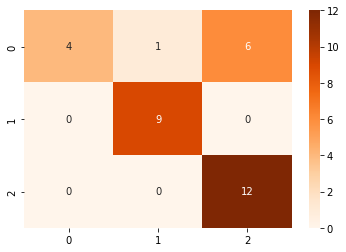

In [ ]:
# Plotting confusion Matrix for Knn
from sklearn.metrics import confusion_matrix
Y_predsvm = cross_val_predict(svcpoly, X_test, Y_test, cv=10)
cf_matrix = confusion_matrix(Y_test, Y_predsvm)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Oranges")
plt.show()

In [ ]:
# Classification Report of SVM
print(classification_report(Y_test, Y_predsvm, 
                            target_names = ['1','2','3']))

              precision    recall  f1-score   support

           1       1.00      0.36      0.53        11
           2       0.90      1.00      0.95         9
           3       0.67      1.00      0.80        12

    accuracy                           0.78        32
   macro avg       0.86      0.79      0.76        32
weighted avg       0.85      0.78      0.75        32



In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_predsvm,average='macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_predsvm,average='macro')
print('Recall: %f' % recall)

f1score = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1score)

Precision: 0.855556
Recall: 0.787879
F1 score: 0.820324


In [ ]:
#Helper function to plot the decision boundary
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [ ]:
# Visualize the decision boundaries
plot_decision_regions(X_train, Y_train, classifier=svcrbf)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

ValueError: X.shape[1] = 2 should be equal to 50000, the number of features at training time

# Decision Tree

In [ ]:
decisiontree1 = DecisionTreeClassifier(criterion    =  'entropy',
                                          max_depth    =  20,
                                          random_state=0 )
decisiontree1.fit(X_trains,Y_train)
    #Y_pred = decisiontree.predict(X_test)

    #print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv2 = RepeatedKFold(n_splits=20, n_repeats=20,random_state=42)
    
score = cross_val_score(decisiontree1, X_tests, Y_test, scoring='accuracy', cv=cv2)
print('Depth=%d : %.3f' % (10, (np.mean(score))))
#With scaling, depth:10,n_splits=20, n_repeats=20,gini--- 84.8

Depth=10 : 0.848


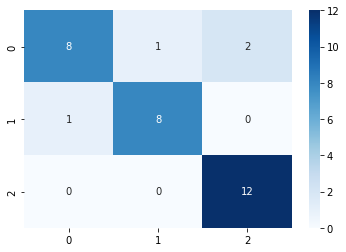

In [ ]:
# Plotting confusion Matrix for decisiontree
from sklearn.metrics import confusion_matrix
Y_preddt = cross_val_predict(decisiontree1, X_tests, Y_test, cv=10)

cf_matrix = confusion_matrix(Y_test, Y_preddt)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Blues")
plt.show()

### DT's of different depth

In [ ]:
# Decision Tree classification
for i in range(5,20):
    decisiontree2 = DecisionTreeClassifier(criterion    =  'entropy',
                                          max_depth    =  i,
                                          random_state=0 )
    decisiontree2.fit(X_train,Y_train)
    #Y_pred = decisiontree.predict(X_test)

    #print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
    cv2 = RepeatedKFold(n_splits=20, n_repeats=20,random_state=42)
    
    score = cross_val_score(decisiontree2, X_test, Y_test, scoring='accuracy', cv=cv2)
    print('Depth=%d : %.3f' % (i, (np.mean(score))))
    

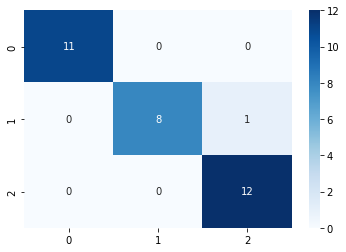

In [ ]:
# Plotting confusion Matrix for decisiontree
from sklearn.metrics import confusion_matrix
Y_preddt = cross_val_predict(decisiontree2, X_test, Y_test, cv=10)

cf_matrix = confusion_matrix(Y_test, Y_preddt)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Blues")
plt.show()

In [ ]:
# Classification Report of DT
print(classification_report(Y_test, Y_preddt, 
                            target_names = ['class 1','class2','class3']))

              precision    recall  f1-score   support

     class 1       0.89      0.73      0.80        11
      class2       0.89      0.89      0.89         9
      class3       0.86      1.00      0.92        12

    accuracy                           0.88        32
   macro avg       0.88      0.87      0.87        32
weighted avg       0.88      0.88      0.87        32



In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_preddt,average='macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_preddt,average='macro')
print('Recall: %f' % recall)

f1score = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1score)

Precision: 0.878307
Recall: 0.872054
F1 score: 0.875169


In [ ]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin/'

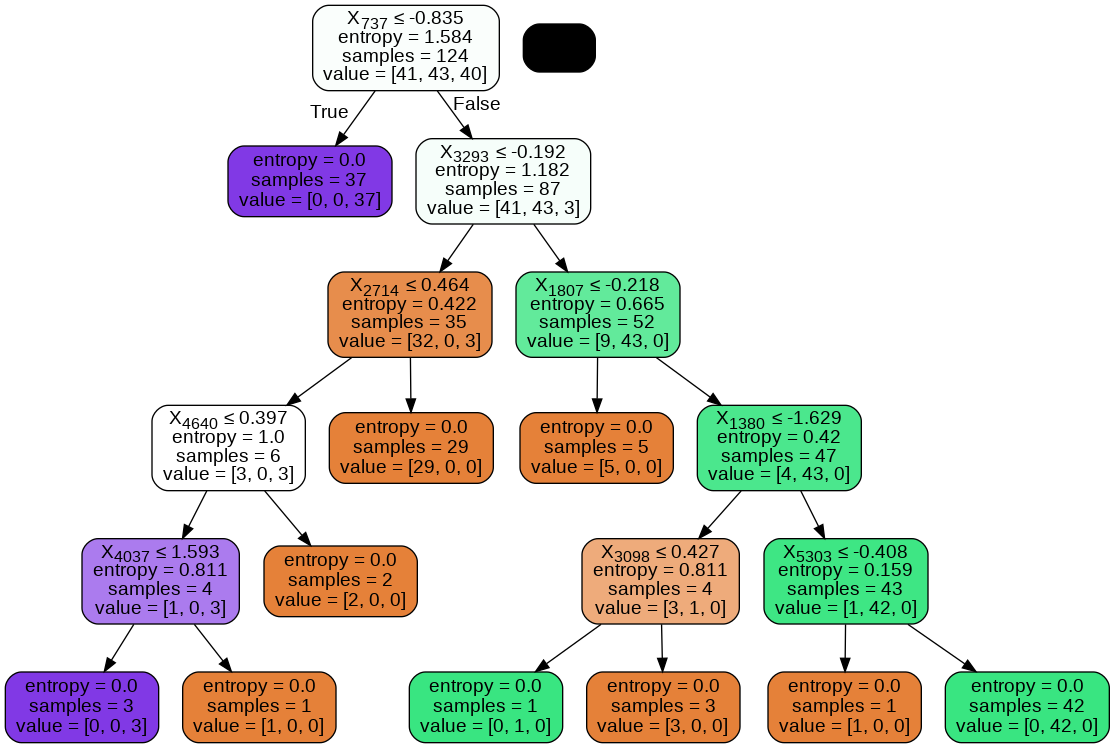

In [ ]:
# Plot the Decision Tree
# https://www.dasca.org/world-of-big-data/article/know-how-to-create-and-visualize-a-decision-tree-with-python 
import matplotlib.pyplot as plt
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(decisiontree1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


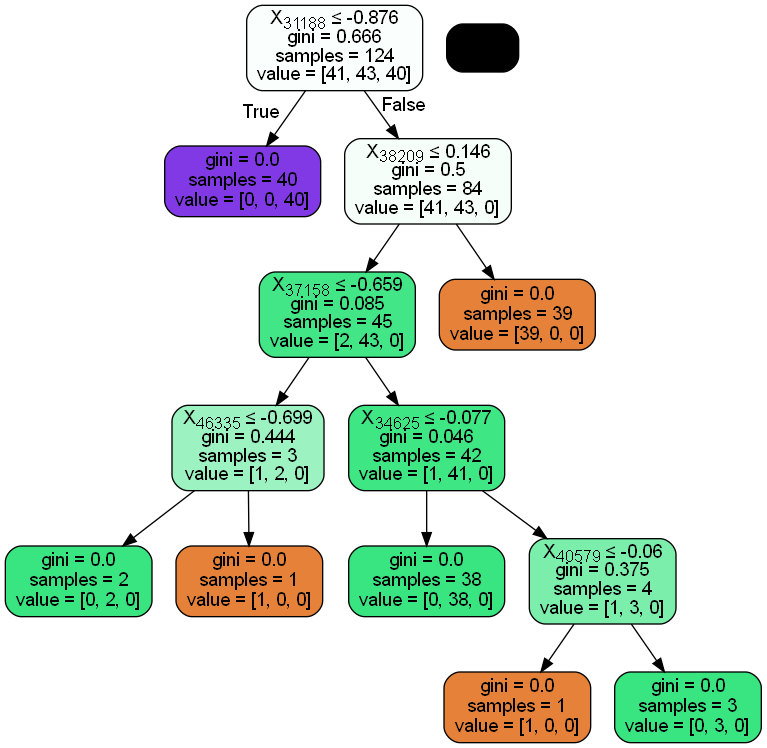

In [ ]:
# Plot the Decision Tree-- Gini Index
# https://www.dasca.org/world-of-big-data/article/know-how-to-create-and-visualize-a-decision-tree-with-python 
import matplotlib.pyplot as plt
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(decisiontree1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Random Forest

In [ ]:
# random forest classification
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000)
rf.fit(X_trains,Y_train)
#Y_pred = rf.predict(X_test)
#print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv1 = RepeatedKFold(n_splits=32, n_repeats=20,random_state=42)
score = cross_val_score(rf, X_tests, Y_test, scoring='accuracy', cv=cv1)
print("Accuracy = " )
print(np.mean(score))
#With scaling--  n_estimators=100, n_splits=32, n_repeats=20--- 93.125
#With scaling--  n_estimators=100, n_splits=32, n_repeats=20--- 93.75

Accuracy = 
0.9375


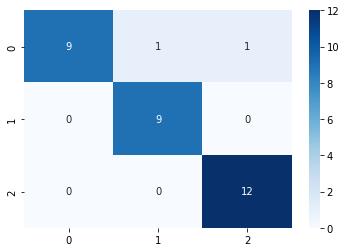

In [ ]:
# Plotting confusion Matrix for random forest
from sklearn.metrics import confusion_matrix
Y_predrf = cross_val_predict(rf, X_test, Y_test, cv=10)

cf_matrix = confusion_matrix(Y_test, Y_predrf)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Blues")
plt.show()

In [ ]:
# Classification Report of rf
print(classification_report(Y_test, Y_predrf, 
                            target_names = ['class 1','class2','class3']))

              precision    recall  f1-score   support

     class 1       1.00      0.82      0.90        11
      class2       0.90      1.00      0.95         9
      class3       0.92      1.00      0.96        12

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_predrf,average='macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_predrf,average='macro')
print('Recall: %f' % recall)

f1score = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1score)

Precision: 0.941026
Recall: 0.939394
F1 score: 0.940209


# XG Boost

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(max_depth=50,learning_rate=0.001)
#print(xgb_cl)

In [ ]:

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="multi:softprob")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, Y_train)

In [ ]:
grid_cv.best_score_

In [ ]:
xgb_cl.fit(X_train, Y_train)


XGBClassifier(learning_rate=0.001, max_depth=50, objective='multi:softprob')

In [ ]:
preds = xgb_cl.predict(X_test)

In [ ]:
accuracy_score(Y_test, preds)
#max depth: 10- 90.6
#max depth:20- 93.75



0.9375

# Naive Bayes

In [ ]:
# naive bayes classification
from sklearn import naive_bayes
nb = naive_bayes.GaussianNB()
nb.fit(X_trains,Y_train)


#Y_pred = nb.predict(X_test)

#print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv1 = RepeatedKFold(n_splits=20, n_repeats=20,random_state=42)
score = cross_val_score(nb, X_tests, Y_test, scoring='accuracy', cv=cv1)
print("Accuracy = " )
print(np.mean(score))
#without scaling: 90

Accuracy = 
0.9


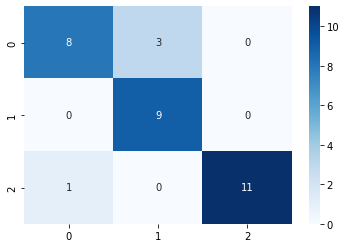

In [ ]:
# Plotting confusion Matrix for NB
from sklearn.metrics import confusion_matrix
Y_prednb = cross_val_predict(nb, X_tests, Y_test, cv=10)

cf_matrix = confusion_matrix(Y_test, Y_prednb)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Blues")
plt.show()

In [ ]:
# Classification Report of nb
print(classification_report(Y_test, Y_prednb, 
                            target_names = ['class 1','class2','class3']))

              precision    recall  f1-score   support

     class 1       0.89      0.73      0.80        11
      class2       0.75      1.00      0.86         9
      class3       1.00      0.92      0.96        12

    accuracy                           0.88        32
   macro avg       0.88      0.88      0.87        32
weighted avg       0.89      0.88      0.87        32



In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_prednb,average='macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_prednb,average='macro')
print('Recall: %f' % recall)

f1score = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1score)

Precision: 0.879630
Recall: 0.881313
F1 score: 0.880471


# Model development with pca

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_trainp = sc.fit_transform(X_train)
X_testp = sc.transform(X_test)

In [ ]:
# Using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
# SVM Classification
svcrbf=SVC(kernel="linear",C=200) 
svcrbf.fit(X_train_pca,Y_train)
#Y_pred = svc.predict(X_test)

#print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv1 = RepeatedKFold(n_splits=20, n_repeats=100,random_state=42)
score = cross_val_score(svcrbf, X_test_pca, Y_test, scoring='accuracy', cv=cv1)
print("Accuracy = " )
print(np.mean(score))

Accuracy = 
0.8745


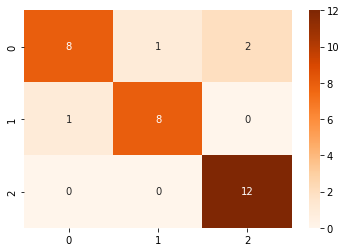

In [ ]:
# Plotting confusion Matrix for Knn
from sklearn.metrics import confusion_matrix
Y_predsvm = cross_val_predict(svcrbf, X_test_pca, Y_test, cv=10)

cf_matrix = confusion_matrix(Y_test, Y_predsvm)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Oranges")
plt.show()

In [ ]:
# SVM Classification
svclin=SVC(kernel="linear") 
svclin.fit(X_train_pca,Y_train)
#Y_pred = svc.predict(X_test)

#print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv1 = RepeatedKFold(n_splits=20, n_repeats=20,random_state=42)
score = cross_val_score(svclin, X_test_pca, Y_test, scoring='accuracy', cv=cv1)
print("Accuracy = " )
print(np.mean(score))

Accuracy = 
0.86375


In [ ]:
X_train_pca.shape

(124, 50)

In [ ]:
X_train.shape

(124, 50000)

In [ ]:
X_train_pca[:,1]
    

array([  5.17543723,  25.06364822,  -6.56407012,   5.66178013,
        10.6619978 ,  -5.54815705,   5.52838451,   5.56432219,
        12.24542322,   7.32955355,  11.54030761,  -7.99468853,
         9.98383584,  -5.04099433,   8.84376512,  46.98885136,
       -24.95253599,  12.87080273,   5.57707674, 166.51352534,
         5.60682362,  -3.20659996,   5.59210381,   5.78438903,
         5.67973788,   2.85792846, -26.17282582,   1.78336002,
         7.34506055, -25.58690522,  -2.01955332,   1.32279323,
         5.63899434, -18.5227804 , -25.61364076, -74.64934337,
        37.16201659,   5.56806632, -17.14493532,   5.57352886,
       -17.54269651,  30.41569879,   7.86298615,   6.71762911,
       -41.98682591,   5.38107021,   6.2327132 ,   5.32308449,
       -23.87997183,   5.78195106,  27.61449436,   6.1014497 ,
       -32.21061776, -12.45362579, -11.01610328,   5.83675241,
        25.06364822, -19.66226642, -11.08772745,  36.61034481,
        19.54531055, -14.38195116, -25.61364076,  -6.85